In [1]:
import uproot
import pandas as pd
import numpy as np
from pylorentz import Momentum4
import matplotlib.pyplot as plt

In [2]:
tree_tt = uproot.open("/vols/cms/dw515/Offline/output/SM/master_gen_ntuple_1502/MVAFILE_tt.root")["ntuple"]

In [3]:
tree_tt.keys()

[b'rand',
 b'wt_cp_sm',
 b'wt_cp_ps',
 b'wt_cp_mm',
 b'pi_px_1',
 b'pi_py_1',
 b'pi_pz_1',
 b'pi_E_1',
 b'pi2_px_1',
 b'pi2_py_1',
 b'pi2_pz_1',
 b'pi2_E_1',
 b'pi3_px_1',
 b'pi3_py_1',
 b'pi3_pz_1',
 b'pi3_E_1',
 b'pi_px_2',
 b'pi_py_2',
 b'pi_pz_2',
 b'pi_E_2',
 b'pi2_px_2',
 b'pi2_py_2',
 b'pi2_pz_2',
 b'pi2_E_2',
 b'pi3_px_2',
 b'pi3_py_2',
 b'pi3_pz_2',
 b'pi3_E_2',
 b'pi0_px_1',
 b'pi0_py_1',
 b'pi0_pz_1',
 b'pi0_E_1',
 b'pi0_px_2',
 b'pi0_py_2',
 b'pi0_pz_2',
 b'pi0_E_2',
 b'nu_px_1',
 b'nu_py_1',
 b'nu_pz_1',
 b'nu_E_1',
 b'nu_px_2',
 b'nu_py_2',
 b'nu_pz_2',
 b'nu_E_2',
 b'sv_x_1',
 b'sv_y_1',
 b'sv_z_1',
 b'sv_x_2',
 b'sv_y_2',
 b'sv_z_2',
 b'ip_x_1',
 b'ip_y_1',
 b'ip_z_1',
 b'ip_x_2',
 b'ip_y_2',
 b'ip_z_2',
 b'dm_1',
 b'dm_2',
 b'metx',
 b'mety',
 b'reco_sv_x_1',
 b'reco_sv_y_1',
 b'reco_sv_z_1',
 b'reco_ip_x_1',
 b'reco_ip_y_1',
 b'reco_ip_z_1',
 b'reco_dm_1',
 b'reco_metx',
 b'reco_mety',
 b'reco_pi_px_1',
 b'reco_pi_py_1',
 b'reco_pi_pz_1',
 b'reco_pi_E_1',
 b'reco_pi0_

In [4]:
variables = ['rand','wt_cp_sm','wt_cp_ps','wt_cp_mm','pi_px_1','pi_py_1','pi_pz_1','pi_E_1','pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1', 'pi_px_2', 'pi_py_2',
 'pi_pz_2', 'pi_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2',
 'pi3_E_2', 'pi0_px_1', 'pi0_py_1',
 'pi0_pz_1', 'pi0_E_1', 'pi0_px_2',
 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2',
 'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1', 'nu_px_2', 'nu_py_2', 'nu_pz_2',
 'nu_E_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2', 'sv_z_2',
 'ip_x_1',
 'ip_y_1',
 'ip_z_1',
 'ip_x_2',
 'ip_y_2',
 'ip_z_2',
 'dm_1',
 'dm_2',
 'metx',
 'mety',
 'reco_sv_x_1',
 'reco_sv_y_1',
 'reco_sv_z_1',
 'reco_ip_x_1',
 'reco_ip_y_1',
 'reco_ip_z_1',
 'reco_dm_1',
 'reco_metx',
 'reco_mety',
 'reco_pi_px_1',
 'reco_pi_py_1',
 'reco_pi_pz_1',
 'reco_pi_E_1',
 'reco_pi0_px_1',
 'reco_pi0_py_1',
 'reco_pi0_pz_1',
 'reco_pi0_E_1']

df = tree_tt.pandas.df(variables)

In [5]:
df.head()

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,0.000000,0.000000,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
1,0.625262,1.616939,0.048255,0.718878,-3.553889,36.892234,-71.120615,80.198681,-0.777037,7.064672,...,-3.755084,-31.098110,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
2,0.600541,0.145634,1.555381,0.524301,33.907569,22.022118,48.396957,63.063316,0.000000,0.000000,...,16.753761,26.357396,34.248133,21.900111,48.527971,63.305078,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,0.000000,0.000000,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
4,0.604970,0.370084,1.765682,1.648769,-4.350674,-2.053902,2.661596,5.500041,-21.207954,-8.676636,...,-18.461578,-18.737030,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [10]:
df_rho_rho = df[(df['dm_1'] == 1) & (df['dm_2'] == 1)]

In [11]:
df_rho_rho = df_rho_rho.drop(['reco_sv_x_1', 'reco_sv_y_1', 'reco_sv_z_1',
                             'pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1',
                             'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'pi0_px_1',
                             ], axis=1)

In [14]:
# checking MET info
(df.metx - df.reco_metx)/df.metx

entry
0            -0.073741
1             1.814165
2             0.213933
3             1.721428
4           -26.501421
               ...    
19123556      1.885160
19123557      0.478351
19123558   -239.414345
19123559     -0.234290
19123560    490.868064
Length: 19123561, dtype: float64

In [8]:
(df_rho_rho == 0).sum()

rand                  0
wt_cp_sm              1
wt_cp_ps              0
wt_cp_mm              0
pi_px_1             319
pi_py_1             319
pi_pz_1             319
pi_E_1              252
pi_px_2             319
pi_py_2             319
pi_pz_2             319
pi_E_2              252
pi0_py_1            319
pi0_pz_1            319
pi0_E_1             252
pi0_px_2            319
pi0_py_2            319
pi0_pz_2            319
pi0_E_2             252
nu_px_1             319
nu_py_1             319
nu_pz_1             319
nu_E_1              319
nu_px_2             319
nu_py_2             319
nu_pz_2             319
nu_E_2              319
sv_x_1              319
sv_y_1              319
sv_z_1              348
sv_x_2              319
sv_y_2              321
sv_z_2              342
ip_x_1                0
ip_y_1                0
ip_z_1                0
ip_x_2                0
ip_y_2                0
ip_z_2                0
dm_1                  0
dm_2                  0
metx            

In [69]:
df.shape

(19123561, 77)

In [24]:
df_rho_rho[(df_rho_rho != -9999.0).all(1)]

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi_px_2,pi_py_2,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,-35.655722,-31.039530,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,-9.257474,-3.170107,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
26,0.265558,0.097559,1.220078,0.888257,-30.361598,24.887077,-45.795520,60.319502,5.743575,-4.812580,...,22.855553,-11.304820,-30.062886,24.647282,-45.322473,59.711068,-10.014409,8.153324,-14.712737,19.576719
37,0.029581,1.873361,0.628985,1.144184,25.124117,-11.419798,-20.711580,34.505392,-2.099493,2.072754,...,23.957280,-1.657396,24.837628,-11.285337,-20.470978,34.107589,4.050087,-1.847847,-2.974647,5.355788
53,0.016156,1.604695,1.644624,1.553855,-43.350537,-16.686834,22.467560,51.599712,3.925524,1.446574,...,-17.396888,-6.966372,-44.297783,-17.058390,22.978978,52.738365,-13.033956,-5.522742,6.887171,15.742809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19123539,0.348177,0.329244,0.741613,0.858589,-17.171053,63.000634,86.592358,108.453589,-3.803768,-5.206595,...,-5.036643,-0.433350,-17.179913,63.012485,86.611657,108.477284,-3.171834,11.110264,15.255425,19.137520
19123553,0.993328,1.680099,0.345456,0.427561,-5.401129,-37.023264,-24.259346,44.591811,-30.927280,-16.407392,...,-49.303244,-75.670557,-5.392348,-36.857633,-24.155590,44.396785,-5.265202,-33.431482,-21.262853,39.968906
19123555,0.226161,0.282667,1.316681,0.532847,10.344487,3.209120,0.932993,10.871836,22.639038,13.095114,...,35.694586,104.324107,10.296579,3.196219,0.921078,10.821423,50.662051,13.868286,2.761659,52.598647


In [12]:
df_rho_rho = df_rho_rho[(df_rho_rho == -9999.0).sum(1) < 2]

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rho_rho.iloc[1])

In [15]:
reco_pi = Momentum4(df_rho_rho.reco_pi_E_1, df_rho_rho.reco_pi_px_1, df_rho_rho.reco_pi_py_1, df_rho_rho.reco_pi_pz_1,)
reco_pi_ang = np.array([reco_pi.eta, reco_pi.phi, reco_pi.p_t])

pi = Momentum4(df_rho_rho.pi_E_1, df_rho_rho.pi_px_1, df_rho_rho.pi_py_1, df_rho_rho.pi_pz_1,)
# pi_ang = np.array([pi.eta, pi.phi, pi.p_t])

In [38]:
pi_eta_dist = reco_pi.eta - pi.eta

In [29]:
pi_p_t_dist = reco_pi.p_t - pi.p_t

In [31]:
cdf = np.cumsum(pi_p_t_dist)
cdf_y = cdf_y/cdf_y.max()

array([ 4.62827682e-02, -5.51186562e-01, -9.34220314e-01, ...,
       -1.96640202e+06, -1.96640203e+06, -1.96640220e+06])

In [16]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins='scott', density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

def its_2(data, n_samples):
    hist, bins = np.histogram(data, bins='scott')
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n_samples)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [58]:
test = inverse_transform_sampling(pi_p_t_dist, n_samples=2983726)

In [59]:
test2 = its_2(pi_p_t_dist, n_samples=2983726)

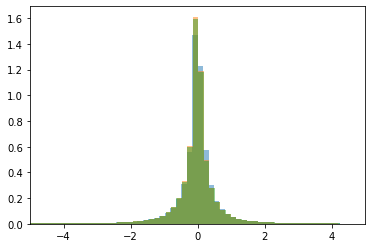

In [62]:
plt.hist(test, alpha=0.5, bins='scott', density=True)
plt.hist(test2, alpha=0.5, bins='scott', density=True)
plt.hist(pi_p_t_dist, alpha=0.5, bins='scott', density=True)
plt.xlim(-5, 5)
plt.show()

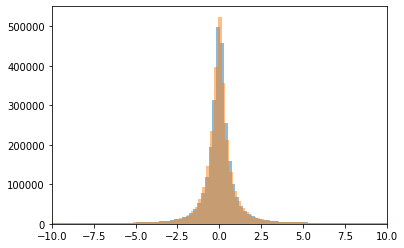

In [66]:
plt.hist(pi_p_t_dist-test2, bins='scott', alpha=0.5)
plt.hist(pi_p_t_dist-test, bins='scott', alpha=0.5)
plt.xlim(-10, 10)
plt.show()

In [67]:
np.mean(pi_p_t_dist-test2), np.std(pi_p_t_dist-test2, ddof=1)

(0.005249087363653257, 9.44772938935636)

In [68]:
np.mean(pi_p_t_dist-test), np.std(pi_p_t_dist-test, ddof=1) # test 2 is a bit better

(0.005442701911110066, 9.506635913284997)

In [70]:
a = 'pi_2'

In [71]:
a.split('_')

['pi', '2']

In [62]:
reco_pi_1 = Momentum4(df_rho_rho.reco_pi_E_1, df_rho_rho.reco_pi_px_1, df_rho_rho.reco_pi_py_1, df_rho_rho.reco_pi_pz_1,)
pi_1 = Momentum4(df_rho_rho.pi_E_1, df_rho_rho.pi_px_1, df_rho_rho.pi_py_1, df_rho_rho.pi_pz_1,)
e_dist = (reco_pi_1.e - pi_1.e)/pi_1.e
eta_dist = reco_pi_1.eta - pi_1.eta
phi_dist = reco_pi_1.phi - pi_1.phi

e_dist_sample = its_2(e_dist, df_rho_rho.shape[0])
eta_dist_sample = its_2(eta_dist, df_rho_rho.shape[0])
phi_dist_sample = its_2(phi_dist, df_rho_rho.shape[0])

smeared_e = pi_1.e*(1+e_dist_sample)
smeared_eta = pi_1.eta + eta_dist_sample
smeared_phi = pi_1.phi + phi_dist_sample
pi_mass = 0.13957
# e^2 = m^2 + p^2
smeared_p_mag = np.sqrt(smeared_e**2 - pi_mass**2)
smeared_p_t = smeared_p_mag/np.cosh(smeared_eta)
smeared_pi_1 = Momentum4.e_eta_phi_pt(smeared_e, smeared_eta, smeared_phi, smeared_p_t)

<ipython-input-62-09121d20d641>:16: RuntimeWarning: invalid value encountered in sqrt
  smeared_p_mag = np.sqrt(smeared_e**2 - pi_mass**2)


In [63]:
smeared_e, smeared_p_mag

(array([ 5.43935505, 29.13894802, 60.5217216 , ..., 10.90828396,
         4.32492271, 10.53075413]),
 array([ 5.43756412, 29.13861376, 60.52156067, ..., 10.90739103,
         4.32267008, 10.52982919]))

In [64]:
(np.isnan(smeared_p_mag)).sum()

407

In [59]:
np.isnan(smeared_pi_1).sum()/3

407.0

## check smeared dataframe

In [28]:
df_smeared = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared.h5', 'df')

In [29]:
df_smeared.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,10.994950,8.404180,6.915075,1.555936,22.769319,16.963737,14.569723,4.287013,46.850081,-35.517062,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.041587,24.443190,-4.880136,-14.903323,8.565440,7.234810,-1.743771,-4.238552,21.973095,-9.356741,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.037782,6.726276,6.604666,3.445747,49.058912,32.886199,32.946126,15.485779,0.621660,-54.469666,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,61.296869,-2.413211,30.969841,52.842521,4.134056,-0.268372,2.131055,3.529700,32.947940,3.177239,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.820840,21.968763,27.752590,-30.648634,9.237175,4.012812,5.591140,-6.159843,13.822463,11.453936,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [8]:
df_orig = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig.h5', 'df')

In [9]:
df_orig.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,10.994950,8.404180,6.915075,1.555936,22.769319,16.963737,14.569723,4.287013,47.278106,-35.655722,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.041587,24.443190,-4.880136,-14.903323,8.565440,7.234810,-1.743771,-4.238552,21.899677,-9.257474,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.037782,6.726276,6.604666,3.445747,49.058912,32.886199,32.946126,15.485779,57.100717,-54.699795,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,61.296869,-2.413211,30.969841,52.842521,4.134056,-0.268372,2.131055,3.529700,33.248954,3.150124,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.820840,21.968763,27.752590,-30.648634,9.237175,4.012812,5.591140,-6.159843,14.125586,10.222310,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [40]:
(df_smeared.pi_E_2<0).sum()

0

In [15]:
df_smeared_2 = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared_2.h5', 'df')

In [16]:
df_smeared_2.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,10.895408,8.350271,6.884533,1.553527,22.769319,16.963737,14.569723,4.287013,47.278106,-35.655722,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,28.778663,24.388129,-4.844151,-14.850098,8.565440,7.234810,-1.743771,-4.238552,21.899677,-9.257474,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.195960,6.328401,6.226249,3.250527,49.058912,32.886199,32.946126,15.485779,57.100717,-54.699795,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,61.502365,-2.541306,32.203884,54.956571,4.134056,-0.268372,2.131055,3.529700,33.248954,3.150124,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.977806,22.206070,28.109260,-31.185144,9.237175,4.012812,5.591140,-6.159843,14.125586,10.222310,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [31]:
df_smeared_2.dm_1

entry
0           1.0
3           1.0
16          1.0
21          1.0
24          1.0
           ... 
19123555    1.0
19123556    1.0
19123557    1.0
19123559    1.0
19123560    1.0
Name: dm_1, Length: 5861320, dtype: float64

In [20]:
df_orig_2 = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig_2.h5', 'df')

In [21]:
df_orig_2.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,11.031810,8.601286,7.091486,1.588702,22.769319,16.963737,14.569723,4.287013,47.278106,-35.655722,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.138948,24.219107,-4.859920,-14.811875,8.565440,7.234810,-1.743771,-4.238552,21.899677,-9.257474,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.445014,6.444354,6.340330,3.310085,49.058912,32.886199,32.946126,15.485779,57.100717,-54.699795,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,60.741927,-2.528510,32.041724,54.712307,4.134056,-0.268372,2.131055,3.529700,33.248954,3.150124,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.977806,21.903567,27.726341,-30.568792,9.237175,4.012812,5.591140,-6.159843,14.125586,10.222310,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [114]:
df_smeared_transformed = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared_transformed.h5', 'df')

In [125]:
df_smeared_transformed.loc[4]

pi_E_1_br           3.367803e+01
pi_px_1_br         -1.604366e+00
pi_py_1_br         -1.819094e-01
pi_pz_1_br          8.272150e+00
pi_E_2_br           2.455655e+01
pi_px_2_br          1.504764e-01
pi_py_2_br         -1.023678e-01
pi_pz_2_br         -2.455548e+01
pi0_E_1_br          2.133359e+01
pi0_px_1_br         1.604366e+00
pi0_py_1_br         1.819094e-01
pi0_pz_1_br         2.127197e+01
pi0_E_2_br          4.993793e+00
pi0_px_2_br        -1.504764e-01
pi0_py_2_br         1.023678e-01
pi0_pz_2_br        -4.988649e+00
rho_E_1_br          5.501162e+01
rho_px_1_br         8.881784e-16
rho_py_1_br         1.332268e-15
rho_pz_1_br         2.954412e+01
rho_E_2_br          2.955034e+01
rho_px_2_br        -4.218847e-15
rho_py_2_br        -1.110223e-15
rho_pz_2_br        -2.954412e+01
aco_angle_1_calc    2.431315e+00
y_rho_1             3.752889e-01
y_rho_2             6.623195e-01
w_a                 1.696484e+00
w_b                 3.968583e-01
m_rho_1             4.640499e+01
m_rho_2   

In [116]:
df_orig_transformed = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig_transformed.h5', 'df')

In [126]:
df_orig_transformed.loc[4]

pi_E_1_br           3.111147e+01
pi_px_1_br         -3.418858e-01
pi_py_1_br         -4.846125e-02
pi_pz_1_br          3.110924e+01
pi_E_2_br           3.745352e+01
pi_px_2_br          1.465496e-01
pi_py_2_br         -1.080728e-01
pi_pz_2_br         -3.745282e+01
pi0_E_1_br          1.396716e+01
pi0_px_1_br         3.418858e-01
pi0_py_1_br         4.846125e-02
pi0_pz_1_br         1.396224e+01
pi0_E_2_br          7.622037e+00
pi0_px_2_br        -1.465496e-01
pi0_py_2_br         1.080728e-01
pi0_pz_2_br        -7.618666e+00
rho_E_1_br          4.507864e+01
rho_px_1_br         3.552714e-15
rho_py_1_br         3.996803e-15
rho_pz_1_br         4.507149e+01
rho_E_2_br          4.507556e+01
rho_px_2_br        -9.148238e-14
rho_py_2_br        -1.221245e-14
rho_pz_2_br        -4.507149e+01
aco_angle_1_calc    2.365364e+00
y_rho_1             3.791891e-01
y_rho_2             6.623195e-01
w_a                 1.696484e+00
w_b                 3.968583e-01
m_rho_1             8.029020e-01
m_rho_2   

In [113]:
(df_smeared_transformed==0).sum()

pi_E_1_br                 0
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br                 0
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br                0
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br                0
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br                0
rho_px_1_br          165823
rho_py_1_br          166960
rho_pz_1_br               0
rho_E_2_br                0
rho_px_2_br           19973
rho_py_2_br           19868
rho_pz_2_br               0
aco_angle_1_calc          2
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1                   0
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [108]:
df_smeared_transformed.shape, df_orig_transformed.shape

((2602666, 38), (5719875, 38))

In [ ]:
df = df_smeared
pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
pi0_1 = Momentum4(df['pi0_E_1'], df["pi0_px_1"], df["pi0_py_1"], df["pi0_pz_1"])
pi0_2 = Momentum4(df['pi0_E_2'], df["pi0_px_2"], df["pi0_py_2"], df["pi0_pz_2"])
rho_1 = pi_1 + pi0_1
rho_2 = pi_2 + pi0_2
# boost into rest frame of resonances
rest_frame = rho_1 + rho_2
boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])

In [ ]:
pi_1_boosted = pi_1.boost_particle(boost)
pi_2_boosted = pi_2.boost_particle(boost)
pi0_1_boosted = pi0_1.boost_particle(boost)
pi0_2_boosted = pi0_2.boost_particle(boost)
rho_1_boosted = pi_1_boosted + pi0_1_boosted
rho_2_boosted = pi_2_boosted + pi0_2_boosted

In [31]:
pi_1_boosted = pi_1.boost_particle(boost)

/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  B[0, 1:, ] = bp
/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  B[1:, 0, ] = bp


In [51]:
pi_1_boosted

Momentum4(array([13.6779592 +0.j, 35.23985262+0.j, 20.04467186+0.j, ...,
        4.45173197+0.j,  5.53304293+0.j, 23.40324791+0.j]), array([10.45229594+0.j, 29.88979733+0.j, 15.00669506+0.j, ...,
        0.28440974+0.j,  2.22431913+0.j, -7.55945899+0.j]), array([  8.80141434+0.j,   1.73381811+0.j, -11.0743429 +0.j, ...,
        -1.00239564+0.j,   4.76316943+0.j, -20.30653428+0.j]), array([ 0.59304575+0.j, 18.58552187+0.j, -7.34352931+0.j, ...,
        4.32582383+0.j, -1.72037951+0.j,  8.84261151+0.j]))

In [40]:
pi_1_boosted[3][np.iscomplex(pi_1_boosted[0])]

array([-8.06305269+15.07907507j, -1.63976769-38.57284081j,
       -1.42514689+10.96285921j, ...,  1.89933133+24.09688377j,
        3.22657205+24.03507787j, -4.63916728-15.04411134j])

In [49]:
pi_1_boosted[0].shape

(5861320,)

In [62]:
%timeit np.real(pi_1_boosted[~np.iscomplex(pi_1_boosted)]).reshape(4, -1)

556 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
def calculateRhoRhoData(df):
    pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
    pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
    pi0_1 = Momentum4(df['pi0_E_1'], df["pi0_px_1"], df["pi0_py_1"], df["pi0_pz_1"])
    pi0_2 = Momentum4(df['pi0_E_2'], df["pi0_px_2"], df["pi0_py_2"], df["pi0_pz_2"])
    rho_1 = pi_1 + pi0_1
    rho_2 = pi_2 + pi0_2
    # boost into rest frame of resonances
    rest_frame = rho_1 + rho_2
    boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
    pi_1_boosted = pi_1.boost_particle(boost)
    pi_2_boosted = pi_2.boost_particle(boost)
    pi0_1_boosted = pi0_1.boost_particle(boost)
    pi0_2_boosted = pi0_2.boost_particle(boost)
    rho_1_boosted = pi_1_boosted + pi0_1_boosted
    rho_2_boosted = pi_2_boosted + pi0_2_boosted

In [27]:
calculateRhoRhoData(df_smeared)

/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  B[0, 1:, ] = bp
/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  B[1:, 0, ] = bp


In [94]:
df = df_smeared_transformed.apply(np.real)

In [95]:
(df==0).sum()

pi_E_1_br            135433
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br            135433
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br           135433
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br           135433
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br           135433
rho_px_1_br          325498
rho_py_1_br          326923
rho_pz_1_br               0
rho_E_2_br           135433
rho_px_2_br           32374
rho_py_2_br           32438
rho_pz_2_br               0
aco_angle_1_calc          0
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1             2798164
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [83]:
df.shape

(5719875, 38)

In [90]:
# df[(df == 0).sum(1) < 1]
(df[df['m_rho_1']!=0]==0).sum()

pi_E_1_br                 0
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br                 0
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br                0
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br                0
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br                0
rho_px_1_br          181184
rho_py_1_br          181999
rho_pz_1_br               0
rho_E_2_br                0
rho_px_2_br           17129
rho_py_2_br           17014
rho_pz_2_br               0
aco_angle_1_calc          0
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1                   0
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [102]:
[x for x in df_smeared_transformed.columns if x.startswith('m')]

['m_rho_1', 'm_rho_2']

In [132]:
pd_combined = pd.concat([df_orig_transformed, df_smeared_transformed], axis=1).dropna()

In [133]:
pd_combined.columns

Index(['pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br',
       'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br',
       'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br', 'pi0_px_2_br',
       'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br', 'rho_px_1_br',
       'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br', 'rho_px_2_br',
       'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1_calc', 'y_rho_1', 'y_rho_2',
       'w_a', 'w_b', 'm_rho_1', 'm_rho_2', 'sv_x_1', 'sv_y_1', 'sv_z_1',
       'sv_x_2', 'sv_y_2', 'sv_z_2', 'y', 'pi_E_1_br', 'pi_px_1_br',
       'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br', 'pi_px_2_br', 'pi_py_2_br',
       'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br', 'pi0_py_1_br', 'pi0_pz_1_br',
       'pi0_E_2_br', 'pi0_px_2_br', 'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br',
       'rho_px_1_br', 'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br',
       'rho_px_2_br', 'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1_calc',
       'y_rho_1', 'y_rho_2', 'w_a', 'w_b', 'm_rho_1', 

In [139]:
pd_combined.pi_E_1_br.iloc[:,0]

0          13.699377
4          31.111472
10          3.558033
12          4.098078
14         30.443939
             ...    
5719868     1.968078
5719870    32.606189
5719871    51.029879
5719873     5.702743
5719874    23.171582
Name: pi_E_1_br, Length: 2921711, dtype: float64

In [159]:
pd_combined.pi_px_1_br

,pi_px_1_br,pi_px_1_br
0,0.367472,0.375101
4,-0.341886,-1.604366
10,-0.091512,0.046484
12,0.059733,1.146557
14,-0.334067,-0.074179
...,...,...
5719868,0.043197,0.005621
5719870,0.220391,0.200288
5719871,-0.140609,0.056147
5719873,0.087761,2.483930


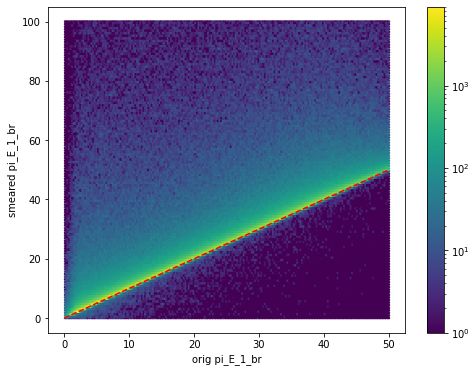

In [154]:
d = pd_combined.pi_E_1_br
d = d[(d.iloc[:,0]<50) & (d.iloc[:,0]>-0) & (d.iloc[:,1]<100) & (d.iloc[:,1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(0, 50), np.linspace(0, 50), '--r')
plt.xlabel('orig pi_E_1_br')
plt.ylabel('smeared pi_E_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_E_1_br_hexbin')
plt.show()

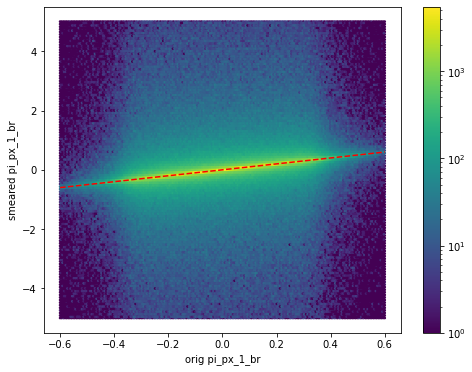

In [167]:
d = pd_combined.pi_px_1_br
d = d[(d.iloc[:,0]<0.6) & (d.iloc[:,0]>-0.6) & (d.iloc[:,1]<5) & (d.iloc[:,1]>-5)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0.6, 0.6), np.linspace(-0.6, 0.6), '--r')
plt.xlabel('orig pi_px_1_br')
plt.ylabel('smeared pi_px_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_px_1_br_hexbin')
plt.show()

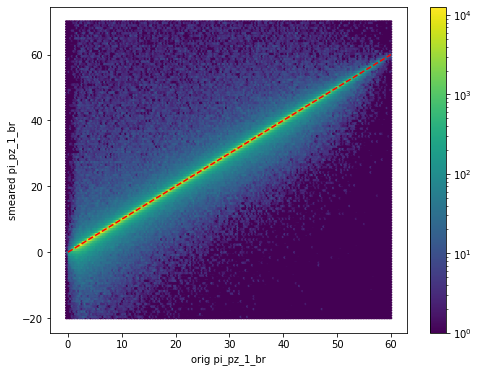

In [177]:
d = pd_combined.pi_pz_1_br
d = d[(d.iloc[:,0]<60) & (d.iloc[:,0]>-10) & (d.iloc[:,1]<70) & (d.iloc[:,1]>-20)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0, 60), np.linspace(0, 60), '--r')
plt.xlabel('orig pi_pz_1_br')
plt.ylabel('smeared pi_pz_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_pz_1_br_hexbin')
plt.show()

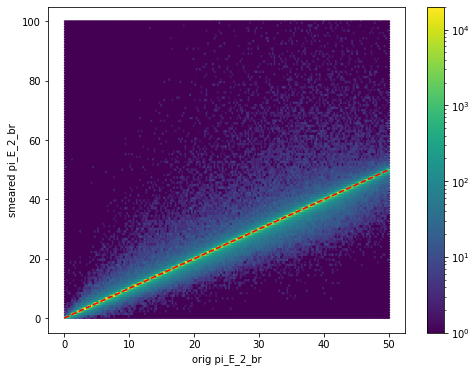

In [181]:
d = pd_combined.pi_E_2_br
d = d[(d.iloc[:,0]<50) & (d.iloc[:,0]>-0) & (d.iloc[:,1]<100) & (d.iloc[:,1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(0, 50), np.linspace(0, 50), '--r')
plt.xlabel('orig pi_E_2_br')
plt.ylabel('smeared pi_E_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_E_2_br_hexbin')
plt.show()

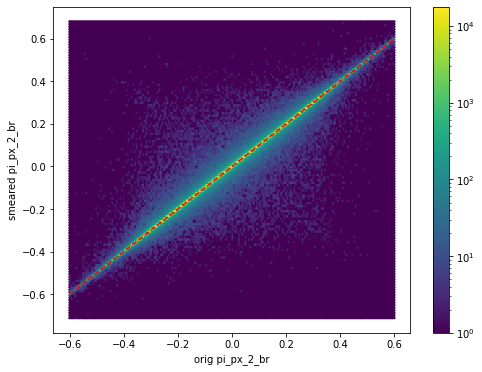

In [182]:
d = pd_combined.pi_px_2_br
d = d[(d.iloc[:,0]<0.6) & (d.iloc[:,0]>-0.6) & (d.iloc[:,1]<5) & (d.iloc[:,1]>-5)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0.6, 0.6), np.linspace(-0.6, 0.6), '--r')
plt.xlabel('orig pi_px_2_br')
plt.ylabel('smeared pi_px_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_px_2_br_hexbin')
plt.show()

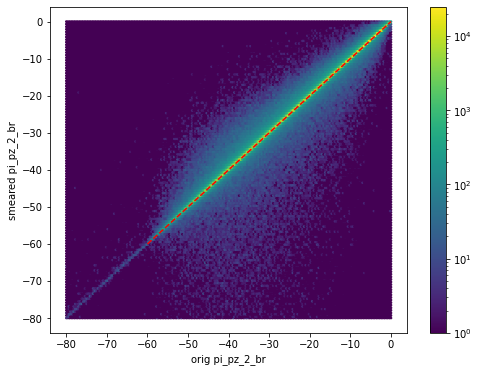

In [188]:
d = pd_combined.pi_pz_2_br
d = d[(d.iloc[:,0]<0) & (d.iloc[:,0]>-80) & (d.iloc[:,1]<0) & (d.iloc[:,1]>-80)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-60, 0), np.linspace(-60, 0), '--r')
plt.xlabel('orig pi_pz_2_br')
plt.ylabel('smeared pi_pz_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_pz_2_br_hexbin')
plt.show()

## smearing patterns we should expect

In [65]:
df_rho_rho.columns

Index(['rand', 'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'pi_px_1', 'pi_py_1',
       'pi_pz_1', 'pi_E_1', 'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2',
       'pi0_py_1', 'pi0_pz_1', 'pi0_E_1', 'pi0_px_2', 'pi0_py_2', 'pi0_pz_2',
       'pi0_E_2', 'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1', 'nu_px_2',
       'nu_py_2', 'nu_pz_2', 'nu_E_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2',
       'sv_y_2', 'sv_z_2', 'ip_x_1', 'ip_y_1', 'ip_z_1', 'ip_x_2', 'ip_y_2',
       'ip_z_2', 'dm_1', 'dm_2', 'metx', 'mety', 'reco_ip_x_1', 'reco_ip_y_1',
       'reco_ip_z_1', 'reco_dm_1', 'reco_metx', 'reco_mety', 'reco_pi_px_1',
       'reco_pi_py_1', 'reco_pi_pz_1', 'reco_pi_E_1', 'reco_pi0_px_1',
       'reco_pi0_py_1', 'reco_pi0_pz_1', 'reco_pi0_E_1'],
      dtype='object')

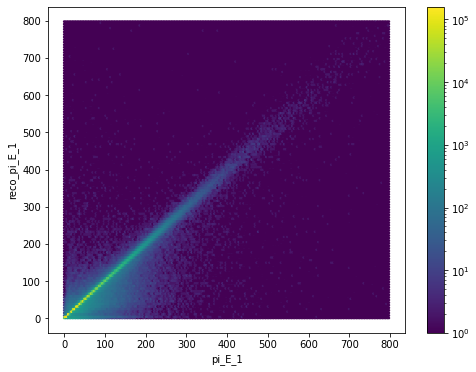

In [76]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_E_1, df_rho_rho.reco_pi_E_1])
d = d[(d[0]<800) & (d[0]>-0) & (d[1]<800) & (d[1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_E_1')
plt.ylabel('reco_pi_E_1')
plt.show()

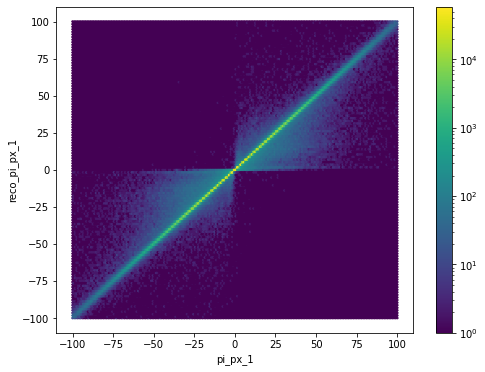

In [77]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_px_1, df_rho_rho.reco_pi_px_1])
d = d[(d[0]<100) & (d[0]>-100) & (d[1]<100) & (d[1]>-100)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_px_1')
plt.ylabel('reco_pi_px_1')
plt.show()

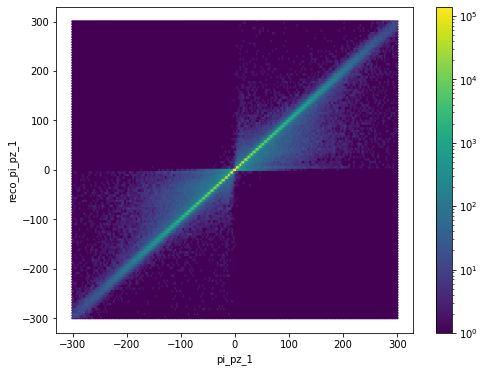

In [78]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_pz_1, df_rho_rho.reco_pi_pz_1])
d = d[(d[0]<300) & (d[0]>-300) & (d[1]<300) & (d[1]>-300)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_pz_1')
plt.ylabel('reco_pi_pz_1')
plt.show()

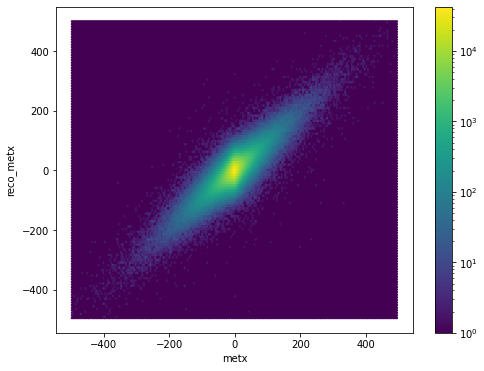

In [81]:
d = pd.DataFrame(np.c_[df_rho_rho.metx, df_rho_rho.reco_metx])
d = d[(d[0]<500) & (d[0]>-500) & (d[1]<500) & (d[1]>-500)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('metx')
plt.ylabel('reco_metx')
plt.show()

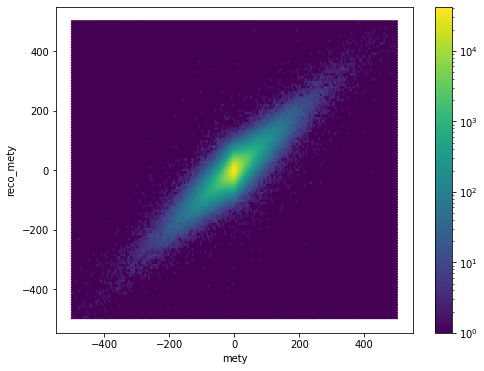

In [82]:
d = pd.DataFrame(np.c_[df_rho_rho.mety, df_rho_rho.reco_mety])
d = d[(d[0]<500) & (d[0]>-500) & (d[1]<500) & (d[1]>-500)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('mety')
plt.ylabel('reco_mety')
plt.show()

In [ ]:
df_gen_reco = df_rho_rho
metx_dist = (df_gen_reco['reco_metx'] - df_gen_reco['metx'])/df_gen_reco['metx']
metx_sample = self.inverseTransformSampling(metx_dist, df.shape[0])
smeared_metx = df['metx']*(1 + metx_sample)
smeared_met.append((df['metx'], smeared_metx))